# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [74]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rmwil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [75]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("API_News")

In [76]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [77]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [78]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [79]:
# Create the Bitcoin sentiment scores DataFrame
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
3,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
4,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815


In [80]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812


In [81]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.181095,0.090800,0.041600,0.867600
std,0.459473,0.059023,0.057329,0.061515
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.225725,0.045750,0.000000,0.834750
50%,0.295700,0.092500,0.000000,0.873500
75%,0.585900,0.145250,0.085500,0.901500
max,0.778300,0.185000,0.169000,1.000000


In [82]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.100645,0.059100,0.026400,0.914550
std,0.351331,0.074079,0.048366,0.088084
min,-0.680800,0.000000,0.000000,0.766000
25%,-0.025675,0.000000,0.000000,0.822500
50%,0.000000,0.042500,0.000000,0.942500
75%,0.232225,0.082750,0.041750,1.000000
max,0.834100,0.234000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ##Bitcoin has the highest mean positive score.

Q: Which coin had the highest compound score?

A: ##Bitcoin has the highest mean positive score.

Q. Which coin had the highest positive score?

A: ##Ethereum has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [83]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [84]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer() 

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop.append("repeat")
stop.append("true")
stop.append("next")
stop.append("believe")
stop = set(stop)

In [85]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [86]:
# Create a new tokens column for Bitcoin
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[Even, arent, paying, attention, Bitcoin, cryp..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[El, Salvador, introduced, Bitcoin, legal, ten..."
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[Israeli, national, Tal, Prihar, pled, guilty,..."
3,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[Netflix, making, docuseries, one, worst, rapp..."
4,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815,"[British, entrepreneur, financier, Richard, OD..."


In [87]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,If people who buy cryptocurrencies intended on...,-0.2023,0.039,0.062,0.899,"[people, buy, cryptocurrencies, intended, hold..."
1,"Technical analysis isnt a perfect tool, but it...",-0.2498,0.000,0.059,0.941,"[Technical, analysis, isnt, perfect, tool, may..."
2,This enables an L1 platform to bootstrap its n...,0.0000,0.000,0.000,1.000,"[enables, L1, platform, bootstrap, national, e..."
3,"The means-and-ends moralists, or non-doers, al...",0.0000,0.000,0.000,1.000,"[means-and-ends, moralist, non-doers, always, ..."
4,Coinbase reported that the share of trading vo...,0.6705,0.188,0.000,0.812,"[Coinbase, reported, share, trading, volume, e..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [88]:
from collections import Counter
from nltk import ngrams

In [89]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('El', 'Salvador'), 3),
 (('Illustration', 'Alex'), 3),
 (('Alex', 'Castro'), 3),
 (('Castro', 'Verge'), 3),
 (('char', 'Feb'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('alongside', 'US'), 2),
 (('US', 'dollar'), 2),
 (('International', 'Monetary'), 2),
 (('Monetary', 'Fund'), 2),
 (('Mr.', 'Lichtensteins'), 2),
 (('Lichtensteins', 'wallet'), 2),
 (('Even', 'arent'), 1),
 (('arent', 'paying'), 1),
 (('paying', 'attention'), 1),
 (('attention', 'Bitcoin'), 1),
 (('Bitcoin', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'might'), 1),
 (('might', 'noticed'), 1),
 (('noticed', 'value'), 1)]

In [90]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'Feb'), 4),
 (('324', 'million'), 4),
 (('char', 'version'), 3),
 (('version', 'article'), 3),
 (('article', 'published'), 3),
 (('published', 'TIME'), 3),
 (('TIME', '’'), 3),
 (('’', 'newsletter'), 3),
 (('newsletter', 'Metaverse'), 3),
 (('Metaverse', 'Subscribe'), 3),
 (('Subscribe', 'weekly'), 3),
 (('weekly', 'guide'), 3),
 (('guide', 'future'), 3),
 (('find', 'past'), 3),
 (('past', 'issue'), 3),
 (('issue', 'newsletter'), 3),
 (('trading', 'volume'), 2),
 (('profile', 'picture'), 2),
 (('char', 'Online'), 2),
 (('Online', 'thief'), 2)]

In [91]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [92]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 14),
 ('Reuters', 5),
 ('El', 4),
 ('cryptocurrency', 4),
 ('Salvador', 3),
 ('dollar', 3),
 ('Illustration', 3),
 ('Alex', 3),
 ('Castro', 3)]

In [93]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('newsletter', 6),
 ('cryptocurrency', 5),
 ('million', 5),
 ('Bitcoin', 5),
 ('Ethereum', 4),
 ('token', 4),
 ('ethereum', 4),
 ('Feb', 4),
 ('Reuters', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [95]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()                                          

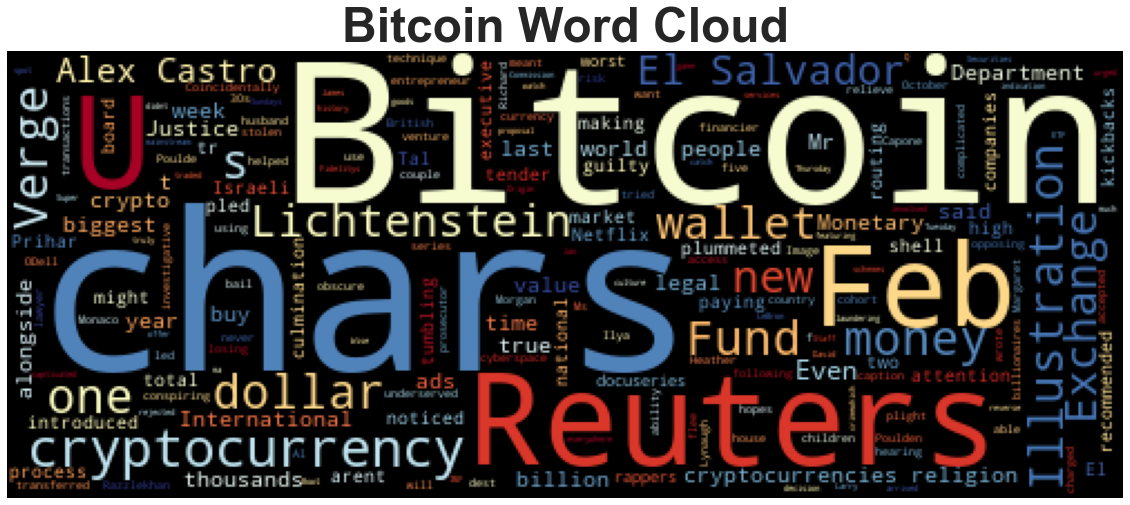

In [96]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

In [97]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()      

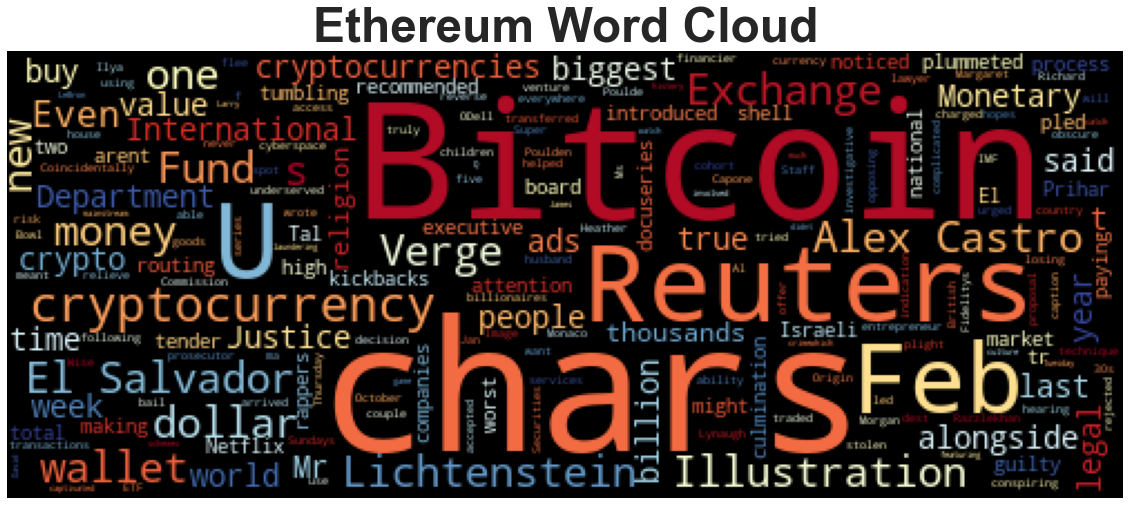

In [98]:
wordcloud(btc.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [99]:
import spacy
from spacy import displacy

In [100]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [101]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [102]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex Castro / The Verge\r\nIn the culmination of a two-year legal process, … [+1448 chars]Netflix\r\n is making a docuseries about one of the worst rappers of all time\r\n. Coincidentally, Heather "Razzlekhan" Morgan and her husband, Ilya Lichtenstein, were charged this week with conspiring t… [+1432 chars]British entrepreneur and financier Richard ODell Poulden hopes that his new venture will relieve the plight of an underserved coho

In [103]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [104]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [69]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
chars]El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
the Department of Justice ORG
Monaco PERSON
Al Capone LOC
Margaret Lynaugh PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Reuters ORG
Jan 26 DATE
Reuters ORG
The U.S. Securities and Exchange Commission ORG
Thursday DATE
ETF ORG
Fidelitys Wise Origin Bitcoin ORG
+202 GPE
Super Bowl EVENT
Larry David PERSON
LeBron James PERSON
+3454 ORG
one CARDINAL
Tuesday DATE
$4.5 billion MONEY
Lichtensteins PERSON
Feb. 1 DATE
roughly $3.6 billion MONEY
one 2020 DATE
Reuters ORG
thousands CARDINAL
202 CARDINAL
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
22

---

### Ethereum NER

In [57]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

'If people who buy cryptocurrencies intended only to hold on to them as speculative investments, there\'d be no real need for crypto wallets. Exchanges and online brokerages that convert dollars to, sa… [+3031 chars]Technical analysis isnt a perfect tool, but it may point the way for Ethereum\r\nEthereum\xa0(ETH-USD\r\n) continues to be a volatile crypto investment. Crypto is volatile by nature Im not setting it apart … [+3612 chars]This enables an L1 platform to bootstrap its national economy over time through a flywheel between financial speculation around its native token and actual building of applications and activities in … [+4057 chars]The means-and-ends moralists, or non-doers, always end up on their ends\r\nwithout any means.\r\n-- Saul AlinskyCoinbase reported that the share of trading volume for ethereum and other altcoins increased last year, while bitcoin\'s share dropped dramatically.\xa0\r\nBetween 2020 and 2021, ethereum trading volume in… [+1187 chars]People in Colorad

In [70]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [71]:
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [73]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Ethereum ORG
ETH-USD ORG
Crypto PERSON
-- Saul AlinskyCoinbase PERSON
last year DATE
Between 2020 and 2021 DATE
Colorado GPE
the middle of this year DATE
US GPE
Jared Polis PERSON
Twitter PRODUCT
Ethereum ORG
second ORDINAL
two months DATE
NFT ORG
7 CARDINAL
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
two hours TIME
YouTube ORG
Waka Flacka Fla ORG
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
4 CARDINAL
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
TIME ORG
weekly DATE
Vita ORG
TIME ORG
weekly DATE
TIME ORG
weekly DATE
3 CARDINAL
Reuters ORG
NFT ORG
later this year DATE
10 CARDINAL
Reuters ORG
Thursday DATE
UK GPE
today DATE
Brett Harrison PERSON
Bitcoin PERSON


---